In [27]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/CABA DATA/churn.csv')


In [28]:
df.head()

,customer_id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,932aff1e-186f-418c-8716-28bba167c384,NY,86,area_code_510,False,False,0,70.7,125,12.02,...,113,17.94,174.6,107,7.86,0.0,0,0.0,2,False
1,143a0b05-b95a-4d00-ad2a-9c1b18234c29,VT,165,area_code_510,False,False,0,242.9,126,41.29,...,65,17.83,228.4,126,10.28,0.0,0,0.0,1,False
2,45debf35-7e4d-42da-ba4e-d737a8997e16,KS,70,area_code_415,False,False,0,222.8,114,37.88,...,113,18.35,223.5,122,10.06,0.0,0,0.0,1,False
3,76b4b68f-1113-4411-88ad-de38b482e9fb,NM,158,area_code_408,False,False,0,172.4,114,29.31,...,69,21.81,235.3,104,10.59,0.0,0,0.0,2,False
4,6ee9cecd-1a09-4f4a-937e-aa848c392bed,ND,101,area_code_415,False,False,0,217.7,118,37.01,...,128,19.69,185.3,128,8.34,0.0,0,0.0,3,False


In [29]:
# drop customer id column because we dont need this for our training data
df.drop(['customer_id'], axis=1, inplace=True)


In [30]:
# Convert 'churn' to numeric
df['churn'] = df['churn'].astype(int)

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['state', 'area_code', 'international_plan', 'voice_mail_plan'], drop_first=True)


In [31]:
# Features and target
X = df.drop(['churn'], axis=1)
y = df['churn']

In [32]:
# split our dataset into 80% training and 20% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[695  21]
 [107  27]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       716
           1       0.56      0.20      0.30       134

    accuracy                           0.85       850
   macro avg       0.71      0.59      0.61       850
weighted avg       0.82      0.85      0.82       850



In [36]:
from sklearn.model_selection import GridSearchCV

# Example hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)


{'C': 0.1}
0.8699999999999999


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Train Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

# Evaluate models
print('Random Forest:')
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print('SVM:')
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


Random Forest:
[[712   4]
 [ 49  85]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       716
           1       0.96      0.63      0.76       134

    accuracy                           0.94       850
   macro avg       0.95      0.81      0.86       850
weighted avg       0.94      0.94      0.93       850

SVM:
[[712   4]
 [117  17]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       716
           1       0.81      0.13      0.22       134

    accuracy                           0.86       850
   macro avg       0.83      0.56      0.57       850
weighted avg       0.85      0.86      0.81       850



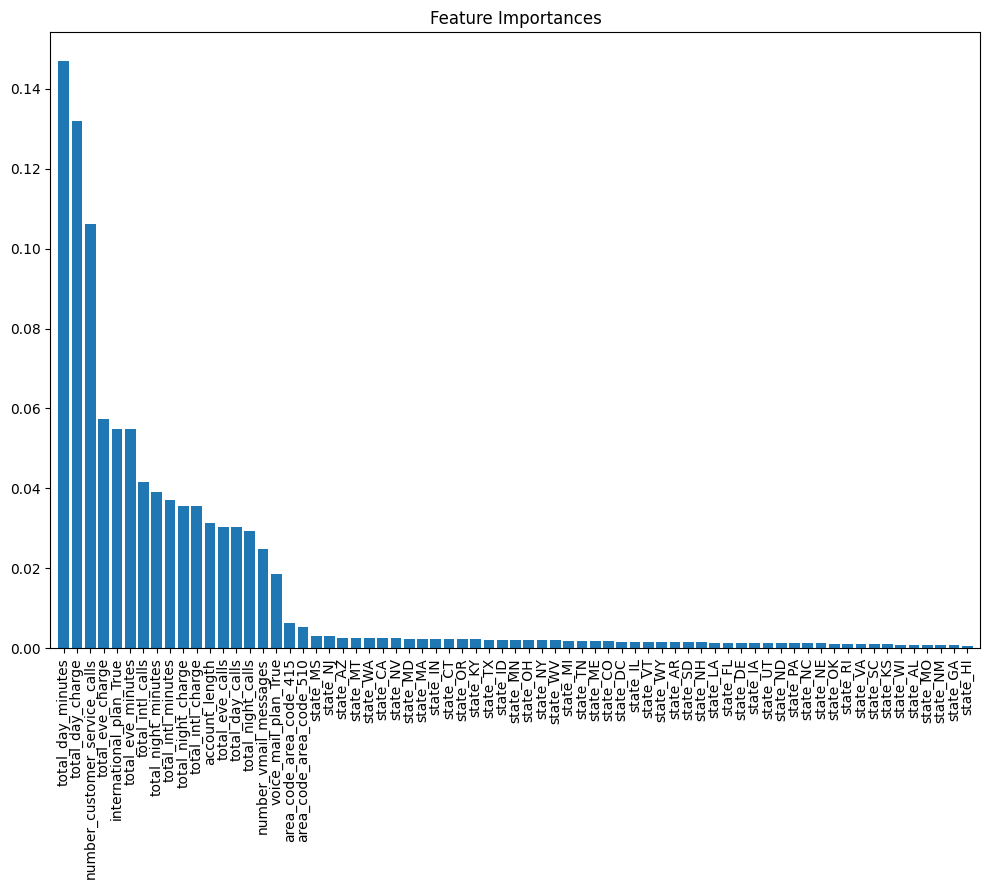

In [38]:
import matplotlib.pyplot as plt

# Feature importances
importances = rf_model.feature_importances_

features = X.columns
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
